# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [9]:
import os
import keras
import warnings
warnings.filterwarnings("ignore")

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape,output_units=10):
    """
    Build your own model
    """
    input_layer=keras.layers.Input(input_shape)
    x=keras.layers.Dense(units=128,activation="relu")(input_layer)
    x=keras.layers.Dense(units=64,activation="relu")(x)
    x=keras.layers.Dense(units=32,activation="relu")(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 128
MOMENTUM = 0.95
OPTIMIZERS=['sgd','RMSprop','adam','Adagrad']
model = build_mlp(input_shape=x_train.shape[1:])

In [10]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for ors in OPTIMIZERS:
    keras.backend.clear_session() 
    print("Experiment with optimizer = " , ors)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=ors)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-optimizer" , ors
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with optimizer =  sgd
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.0672 - acc: 0.2451 - val_loss: 1.8488 - val_acc: 0.3405
Epoch 2/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.8357 - acc: 0.3417 - val_loss: 1.8731 - val_acc: 0.3172
Epoch 3/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.7582 - acc: 0.3694 - val_loss: 1.7699 - val_acc: 0.3599
Epoch 4/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7032 - acc: 0.3879 - val_loss: 1.8253 - val_acc: 0.3411
Epoch 5/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.6637 - acc: 0.4043 - val_loss: 1.7315 - val_acc: 0.3695
Epoch 6/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.6262 - acc: 0.4171 - val_loss: 1.6316 - val_acc: 0.4167
Epoch 7/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5994 - acc: 0.4270 - val_loss: 1.6816 - 

Epoch 2/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.7574 - acc: 0.3718 - val_loss: 1.7034 - val_acc: 0.3769
Epoch 3/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.6581 - acc: 0.4067 - val_loss: 1.6366 - val_acc: 0.4082
Epoch 4/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.6014 - acc: 0.4265 - val_loss: 1.6059 - val_acc: 0.4266
Epoch 5/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.5615 - acc: 0.4418 - val_loss: 1.5414 - val_acc: 0.4561
Epoch 6/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.5263 - acc: 0.4547 - val_loss: 1.5775 - val_acc: 0.4383
Epoch 7/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.5010 - acc: 0.4628 - val_loss: 1.5328 - val_acc: 0.4535
Epoch 8/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.4779 - acc: 0.4733 - val_loss: 1.5298 - val_acc: 0.4567
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 7s 140us/step - loss: 1.8284 - acc: 0.3450 - val_loss: 1.8411 - val_acc: 0.3350
Epoch 4/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.7729 - acc: 0.3707 - val_loss: 1.7633 - val_acc: 0.3712
Epoch 5/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.7324 - acc: 0.3845 - val_loss: 1.7276 - val_acc: 0.3781
Epoch 6/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.6985 - acc: 0.3955 - val_loss: 1.6867 - val_acc: 0.4009
Epoch 7/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.6737 - acc: 0.4044 - val_loss: 1.6634 - val_acc: 0.4093
Epoch 8/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.6517 - acc: 0.4152 - val_loss: 1.6457 - val_acc: 0.4098
Epoch 9/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.6300 - acc: 0.4234 - val_loss: 1.6243 - val_acc: 0.4163
Epoch 10/50
50000/50000 [====================

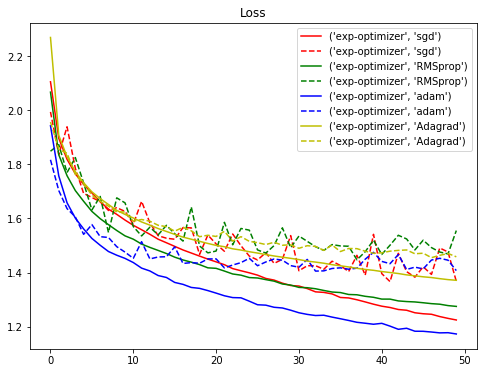

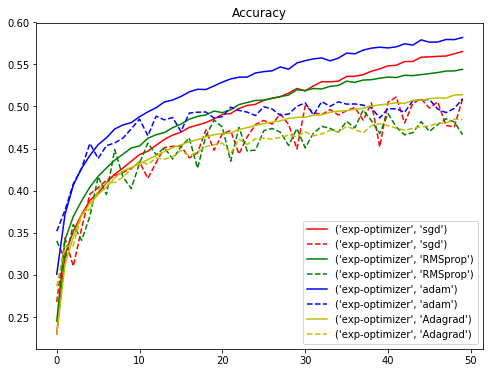

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()